Proyecto Final realizado para el Máster en Ciencia de Datos 2022/23 de la Universidad de Alicante.

Asignatura: Trabajo Fin del Máster

Autor: Kelly Turbay Eljach

# Introducción:

Este trabajo de investigación utilizará un conjunto de datos sobre la estimación de niveles de obesidad basados en hábitos alimentarios y condiciones físicas. El conjunto de datos fue obtenido de la página web del repositorio UCI Machine Learning, específicamente del siguiente enlace: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition.

En este enlace, se anexa un artículo titulado "Obesity Level Estimation Software based on Decision Trees" que describe en detalle la información del dataset: [https://www.sciencedirect.com/science/article/pii/S2352340919306985?via%3Dihub]. Este conjunto de datos ofrece información relevante como hábitos alimentarios, condición física y otros factores relacionados con la obesidad. Estos atributos fueron seleccionados en base a un análisis exhaustivo de la literatura científica.

El artículo ofrece una descripción del proceso de generación del conjunto de datos, incluyendo el proceso de recolección de datos a través de una encuesta en línea y su posterior preprocesamiento realizado por los autores. Esto implica que los datos ya se encuentran limpios y listos para su análisis, lo que nos permite centrarnos directamente en la aplicación de algoritmos de ensembles. Sin embargo, se realizará un proceso de preprocesamiento adicional.

Además, el artículo describe cómo se etiquetaron los datos y la creación de las categorías de niveles de obesidad con base en la normativa de la Organización Mundial de la Salud (OMS) de México.

El objetivo será aplicar varios modelos de ensembles al conjunto de datos de obesidad para desarrollar herramientas computacionales eficientes en la detección de los niveles de obesidad, aprovechando el trabajo previo realizado por los autores del artículo de referencia. Los ensembles son una técnica  utilizada en aprendizaje automático que combina múltiples modelos individuales para mejorar la precisión y  el rendimiento de las predicciones. Para este proyecto, nos inspiramos en el código utilizado por Laura García y Diego Silveira, estudiantes del Máster de Ciencia de Datos en el curso 2021-2022, en su práctica 2 de Minería de Datos. Puedes encontrar el código en la siguiente URL: https://www.kaggle.com/code/diegosilveira/mineria-de-datos-practica-2.

Se espera que este trabajo de investigación contribuya al campo de la detección y prevención de la obesidad, al proporcionar herramientas efectivas basadas en algoritmos de ensembles. Estas herramientas podrían ser de gran utilidad en el ámbito de la salud pública, permitiendo identificar de manera precisa los niveles de obesidad en función de los hábitos alimentarios y la condición física de las personas.

## Importación de librerías y datos
En este apartado se realiza la importación de las librerías necesarias para el pre-procesamiento, interpretación de resultados, análisis y visualización de los datos, así como la carga del dataset y el uso de diferentes técnicas de análisis como regresión, clasificación, ensembles y clustering.

In [1]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/bf/15/d1b649fc7685d11b806b4546a5438191fb2ad761de70da95ff676189dcec/scikit_learn-1.3.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 26.4 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 26.8 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn==1.2.0
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 9.4 MB/s eta 0:00:000m eta 0:00:0136m0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.1 MB/s eta 0:00:0031m3.0 MB/s eta 0:00:01


In [2]:
# Importación de librerías de Python que necesitaremos en este proyecto

#from google.colab import files # trabajar con archivos en Google Colab
import pandas as pd

import time
import warnings
import io
import random

import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import matplotlib as mpl
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import pickle # Serializar datos
import sklearn

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer # Imputación con la librería sklearn
from sklearn.impute import KNNImputer # Imputación  de valores faltantes utilizando el algoritmo K-Nearest Neighbors (KNN)

from sklearn.model_selection import train_test_split # Libreria para realizar train test
from sklearn.linear_model import LogisticRegression,SGDClassifier # Import for LogisticRegression
from sklearn.model_selection import KFold # Import for apply crossvalidation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler # Import LabelEncoder y scaler

from sklearn.metrics import precision_score # Import para la métrica precission
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # R2, MAE y MSE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC # Import para SVC
from sklearn.tree import DecisionTreeRegressor # Decision tree Regressor
from sklearn.neighbors import KNeighborsRegressor # Knn
from sklearn.svm import SVR # SVR
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler # Import scaler
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LinearRegression # LinearRegression
#from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier # Import para DecissionTree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.tree import plot_tree
from sklearn.cluster import MiniBatchKMeans
from sklearn.ensemble import StackingClassifier
from sklearn.utils.multiclass import unique_labels

from tqdm import tqdm
from itertools import cycle, islice
from scipy import stats
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
%matplotlib inline
from typing import Optional

np.random.seed(0)
pd.options.mode.chained_assignment = None  # Evitamos warnings indeseados

In [3]:
# Cargamos el fichero CSV con los datos sobre crímenes en Los Ángeles
df = pd.read_csv("https://raw.githubusercontent.com/kellyturbay/TFM-Ensembles/main/ObesityDataSet_raw_and_data_sinthetic.csv",
                header=0)

df.head(5)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Para analizar datos, es necesario tener una idea general de las características de un conjunto de datos. Para ello, es útil utilizar diversas herramientas estadísticas que nos permitan conocer los datos a tratar y analizar los mismos. Con base en ello, iniciamos con observar un resumen del dataset seleccionado a través del método 'info' que nos permitirá tener un resumen de objeto "Niveles de obesidad".

In [9]:
# Imprimimos información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

## Información sobre el dataset
El dataset está compuesto por 2111 registros y 17 atributos que incluyen información sobre los hábitos alimentarios, la condición física y otras variables relevantes. No hay valores nulos en ninguna columna. Los tipos de datos incluyen valores numéricos (float64) y valores categóricos (object). Este conjunto de datos tiene información recopilada en Colombia, Perú y México con el objetivo de estimar los niveles de obesidad en individuos.

Los atributos relacionados con los hábitos alimentarios incluyen:
 - Consumo frecuente de alimentos altos en calorías (FAVC)
 - Frecuencia de consumo de vegetales (FCVC)
 - Número de comidas principales (NCP)
 - Consumo de alimentos entre comidas (CAEC)
 - Consumo diario de agua (CH20) y
 - Consumo de alcohol (CALC).

Los atributos relacionados con la condición física incluyen:
 - Monitoreo del consumo de calorías (SCC)
 - Frecuencia de actividad física (FAF)
 - Tiempo de uso de dispositivos tecnológicos (TUE) y
 - Tipo de transporte utilizado (MTRANS).

Además de estos atributos, el dataset también incluye variables como género, edad, altura y peso de los individuos.

Todos los datos fueron etiquetados y se créo la variable de clase "NObeyesdad" que clasifica los niveles de obesidad en categorías basándose en una ecuación y en información proporcionada por la OMS (Organización Mundial de la Salud) y la Normativa Mexicana:
- Peso Insuficiente
- Peso Normal
- Sobrepeso Nivel I
- Sobrepeso Nivel II
- Obesidad Tipo I
- Obesidad Tipo II y
- Obesidad Tipo III


A continuación, una breve descripción de las columnas presentes en el conjunto de datos:

1. `Gender`: Género de la persona (valores categóricos: "Male" para masculino y "Female" para femenino).
2. `Age`: Edad de la persona (valor numérico en años, entre 14 y 61 años).
3. `Height`: Altura de la persona (valor numérico en metros).
4. `Weight`: Peso de la persona (valor numérico en kilogramos).
5. `family_history_with_overweight`: Historial familiar de sobrepeso (valores categóricos: "yes" para sí y "no" para no).
6. `FAVC`: Consumo frecuente de alimentos altos en calorías (valores categóricos: "yes" para sí y "no" para no).
7. `FCVC`: Consumo de vegetales y frutas (valor numérico en una escala de 1 a 3: Never, Sometimes, Always).
8. `NCP`: Número de comidas principales al día (valor numérico en una escala de 1 a 3:  Entre 1 y 2, Tres, Mayor a 3).
9. `CAEC`: Consumo de comida entre comidas (valores categóricos: "no", "Sometimes", "Frequently" y "Always").
10. `SMOKE`: Hábito de fumar (valores categóricos: "yes" para sí y "no" para no).
11. `CH2O`: Consumo de agua diario (valor numérico en litros: 1- Menos de un litro. 2 - Entre 1 y 2 litros y 3 - Más de 2 litros).
12. `SCC`: Consumo de bebidas carbonatadas (valores categóricos: "yes" para sí y "no" para no).
13. `FAF`: Actividad física semanal (valor numérico en una escala de 0 a 3:
- 0: No hago actividad física
- 1: 1 o 2 días
- 2: 2 o 4 días
- 3: 4 o 5 días).
14. `TUE`: Tiempo de uso de dispositivos electrónicos (valor numérico en horas:
- 0 a 2 horas
- 3 a 5 horas
- Más de 5 horas).
15. `CALC`: Consumo de alcohol (valores categóricos: "no", "Sometimes", "Frequently" y "Always").
16. `MTRANS`: Medio de transporte utilizado (valores categóricos: "Automobile", "Motorbike", "Bike", "Public_Transportation" y "Walking").
17. `NObeyesdad`: Clasificación de la obesidad (valores categóricos: "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II" y "Obesity_Type_III").



# Limpieza y preparación de datos
En esta sección nos enfocaremos en la limpieza y transformación de los datos. Nuestro objetivo es verificar la presencia de datos duplicados o faltantes, y luego aplicar las transformaciones y filtros necesarios.

## Detección de datos duplicados

Comenzamos por analizar si hay duplicados en los datos, es decir, registros que sean idénticos en todas las columnas.

In [10]:
# Comprobamos si existen filas enteras duplicadas
df.duplicated().sum()

24

In [4]:
df[df.duplicated(keep=False)].head(4)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
97,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
105,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight


Después de realizar la verificación, hemos identificado un total de 24 filas duplicadas en el conjunto de datos.

Estas filas duplicadas corresponden a registros repetidos de individuos. La razón de los datos duplicados podría deberse a errores en la recopilación de datos, ingreso de datos repetidos o cualquier otro problema durante la recolección y almacenamiento de los datos.

Con la finalidad de asegurar la calidad y consistencia de los datos, se eliminará las filas duplicadas, ya que no aportan información adicional y podrían afectar el análisis posterior y los resultados obtenidos.

In [5]:
# Eliminamos las filas enteras duplicadas
df.drop_duplicates()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## Valores ausentes

Ahora verificamos la presencia de valores faltantes en las diversas columnas del conjunto de datos y procederemos a corregirlos en los casos necesarios.

In [13]:
# Obtenemos el número de valores NA en cada columna
df.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

No se observan valores nulos en ninguna de las características del dataset.

## Transformaciones
En esta sección, realizaremos la transformación de los datos para asegurarnos de que estén en sus tipos correctos. Se visualizará los tipos de datos actuales para identificar las columnas que requieren corrección.

In [14]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

Igual, seleccionamos dos registros que tiene valores númericos raros en las columnas: Age, Height, Weight, CH20, FAF, TUE

In [6]:
# Copia del dataframe original
df_backup = df

filas_seleccionadas = df.iloc[[1034, 1286]]
print(filas_seleccionadas)

      Gender        Age    Height     Weight family_history_with_overweight  \
1034    Male  50.832559  1.745528  82.130728                            yes   
1286  Female  47.283374  1.643786  81.978743                            yes   

     FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF  TUE  \
1034  yes  2.000000  3.000000  Sometimes    no  1.774778  no  0.943266  0.0   
1286  yes  2.037585  1.418985  Sometimes    no  1.827351  no  0.000000  0.0   

     CALC      MTRANS           NObeyesdad  
1034   no  Automobile  Overweight_Level_II  
1286   no  Automobile       Obesity_Type_I  


Se procede a redondear los valores de la columana 'Height', 'Weight', a convertir los valores de las columnas 'Age', 'FCVC', 'NCP', 'CH2O','FAF','TUE, de tipo float a entero. Por último, se valida la transformación realizada en estos campos.

In [7]:
# Redondear a 2 dígistos 'Height' y 'Weight'
df['Height'] = df['Height'].apply(lambda x: round(x, 2))
df['Weight'] = df['Weight'].apply(lambda x: round(x, 2))

# Definimos las columnas numéricas que queremos convertir a tipo entero
numeric_columns = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Realizamos el cast de las columnas a tipo entero
df[numeric_columns] = df[numeric_columns].astype(int)

# Mostrar el DataFrame resultante
filas_seleccionadas = df.iloc[[1034, 1286]]
print(filas_seleccionadas)

      Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
1034    Male   50    1.75   82.13                            yes  yes     2   
1286  Female   47    1.64   81.98                            yes  yes     2   

      NCP       CAEC SMOKE  CH2O SCC  FAF  TUE CALC      MTRANS  \
1034    3  Sometimes    no     1  no    0    0   no  Automobile   
1286    1  Sometimes    no     1  no    0    0   no  Automobile   

               NObeyesdad  
1034  Overweight_Level_II  
1286       Obesity_Type_I  


Después de realizar las conversiones, mostramos los tipos de datos resultantes.

In [17]:
# Visualizar tipos de datos finales
df.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

## Valores anómalos
En esta sección, validaremos la existencia de datos anómalos o incorrectos de nuestro conjunto de datos de niveles de obesidad. Para lograrlo, realizaremos algunas verificaciones.

Para comenzar, imprimiremos los valores de la columna peso de los participantes para identificar posibles valores anómalos, como aquellos que se hayan registrado como 0 o -1.

In [18]:
df['Weight'].value_counts()

Weight
80.00     59
70.00     43
50.00     42
75.00     40
60.00     37
          ..
83.31      1
83.39      1
99.81      1
80.01      1
133.35     1
Name: count, Length: 1335, dtype: int64

Generamos un histograma por cada variable a fin de identificar la existencia de datos anómalos.

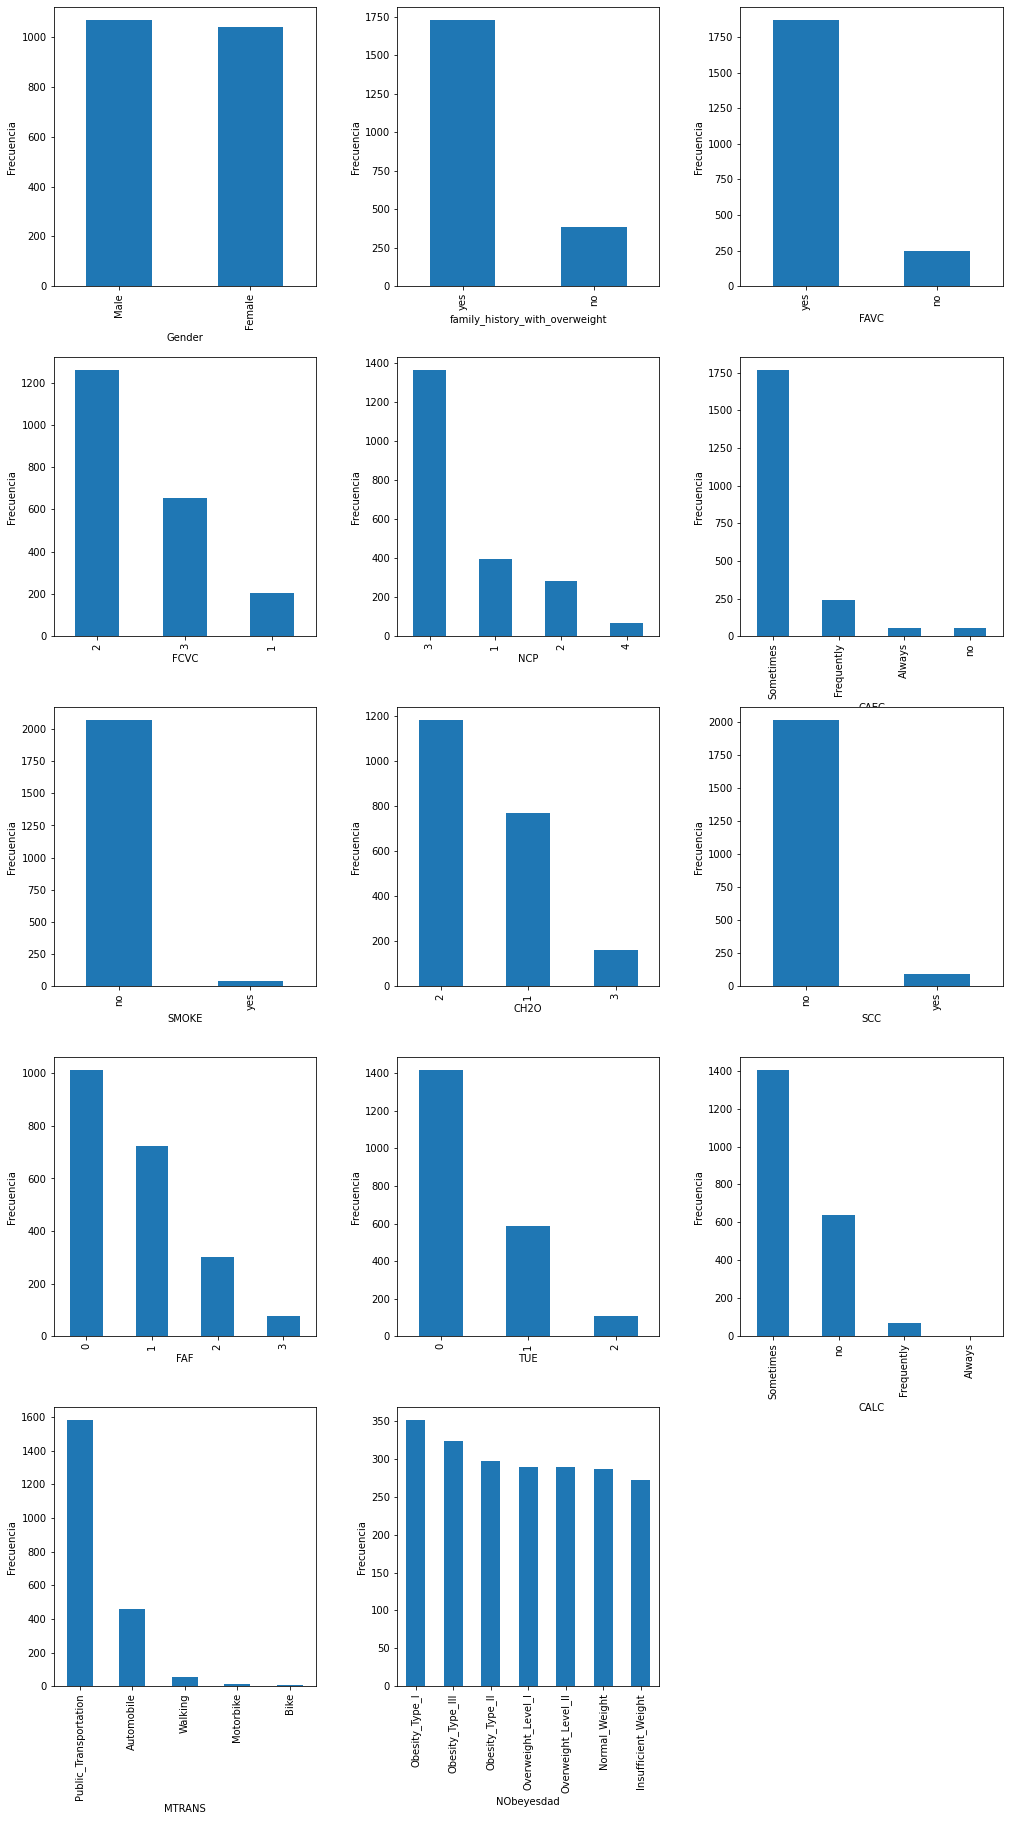

In [8]:
data = pd.DataFrame(df)

# Obtiene las columnas categóricas
categorical_columns = data.select_dtypes(include=['int64', 'float64','object']).columns
categorical_columns = categorical_columns.drop(['Age', 'Weight', 'Height'])

# Calcula el número de filas necesarias
num_rows = (len(categorical_columns) + 2) // 3  # 2 para los títulos y el espaciado

# Genera los gráficos en varias líneas
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
fig.tight_layout(pad=5.0)

for i, column in enumerate(categorical_columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    data[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frecuencia')

# Ajusta los gráficos adicionales si el número de columnas no es múltiplo de 3
if len(categorical_columns) % 3 != 0:
    for i in range(len(categorical_columns) % 3, 3):
        fig.delaxes(axes[num_rows-1, i])
plt.savefig('histograms.png')
plt.show()


No se observaron datos anómalos en el dataset de niveles de obesidad.

In [ ]:
print(f'El conjunto de datos consta de {df.shape[0]} filas y {df.shape[1]} columnas')

El conjunto de datos consta de 2111 filas y 17 columnas


## Filtros

En esta sección, nos enfocaremos en fusionar variables existentes para crear nuevas características y eliminar aquellas que no sean relevantes o necesarias para nuestro análisis. Iniciamos con la edad de la población obtenida en el dataset.

### Edad

In [ ]:
# Edad de los pacientes
df['Age'].value_counts()

21    271
18    238
19    186
23    163
22    161
25    159
26    139
20    137
24     84
17     82
30     65
31     46
29     43
33     36
37     33
38     31
27     31
16     29
34     28
40     22
28     22
39     20
32     18
36     12
35     12
41     11
43      7
42      5
55      5
45      4
47      2
56      1
51      1
44      1
14      1
15      1
50      1
52      1
46      1
61      1
Name: Age, dtype: int64

Basado en los valores obtenidos, se evidencian edades minoritarias dentro del conjunto de datos. No obstante, se optará por no descartar estas edades, ya que la variable respuesta, 'NObeyesdad', se encuentra equilibrada y esto afectaría el balanceo de clases obtenido.

### Height y Weight
Dado que estas variables influyen en el cálculo de la masa muscular y se utilizan para clasificar la variable objetivo, 'NObeyesdad', se ha decidido eliminarlas del conjunto de datos.

In [21]:
df.drop(['Height', 'Weight'], axis=1, inplace=True)

### FAVC: Consumo frecuente de alimentos altos en calorías

Solo tiene 2 clases por lo cual se mantiene los datos.

In [22]:
# Consumo frecuente de alimentos altos en calorías
df['FAVC'].value_counts()

FAVC
yes    1866
no      245
Name: count, dtype: int64

### FCVC: Consumo de vegetales y frutas

Solo tiene 3 clases por lo cual se mantiene los datos.

In [ ]:
# Consumo de vegetales y frutas
df['FCVC'].value_counts()

2    1257
3     652
1     202
Name: FCVC, dtype: int64

### NCP: Número de comidas principales al día

Solo tiene 4 clases por lo cual se mantiene los datos

In [ ]:
# Número de comidas principales al día
df['NCP'].value_counts()

3    1362
1     395
2     285
4      69
Name: NCP, dtype: int64

### CAEC: Consumo de comida entre comidas

Solo tiene 4 clases por lo cual se mantiene los datos

In [ ]:
# Consumo de comida entre comidas
df['CAEC'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

### SMOKE: Hábito de fumar

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
# Hábito de fumar
df['SMOKE'].value_counts()

no     2067
yes      44
Name: SMOKE, dtype: int64

### CH2O: Consumo de agua diario

Solo tiene 3 clases por lo cual se mantiene los datos.

In [ ]:
# Consumo de agua diario
df['CH2O'].value_counts()

2    1180
1     769
3     162
Name: CH2O, dtype: int64

### SCC: Consumo de bebidas carbonatadas

Solo tiene 2 clases por lo cual se mantiene los datos.

In [ ]:
# Consumo de bebidas carbonatadas
df['SCC'].value_counts()

no     2015
yes      96
Name: SCC, dtype: int64

### FAF: Actividad física semanal

Solo tiene 4 clases por lo cual se mantiene los datos.

In [ ]:
# Actividad física semanal
df['FAF'].value_counts()

0    1011
1     724
2     301
3      75
Name: FAF, dtype: int64

### TUE: Tiempo de uso de dispositivos electrónicos

Solo tiene 3 clases por lo cual se mantiene los datos.

In [ ]:
# Tiempo de uso de dispositivos electrónicos
df['TUE'].value_counts()

0    1415
1     587
2     109
Name: TUE, dtype: int64

### CALC: Consumo de alcohol

Se observa una clase minoritaria, por lo cual se procede a su elimnación.

In [ ]:
# Consumo de alcohol
df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [ ]:
# Descartamos las filas donde la edad del paciente es minoritario
df = df[df['CALC'].map(df['CALC'].value_counts(dropna=False)) > 2]

### MTRANS: Medio de transporte utilizado

Se observa una clase minoritaria, por lo cual se procede a su elimnación.

In [ ]:
# Medio de transporte utilizado
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

In [ ]:
# Descartamos las filas donde la edad del paciente es minoritario
df = df[df['CALC'].map(df['CALC'].value_counts(dropna=False)) > 10]

### NObeyesdad: Niveles de obesidad

Se observa niveles balanceados por lo cual se mantiene todas las filas.

In [ ]:
# Niveles de obesidad
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          286
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

# Imputación

Dado que el conjunto de datos no contiene valores nulos o faltantes, no es necesario realizar ningún proceso de imputación.

In [ ]:
# Verificar si hay valores nulos o faltantes en el DataFrame
df.isnull().values.any()

False

# Selección y extracción de características
En esta sección nos enfocaremos en seleccionar y extraer características relevantes de nuestro conjunto de datos. Utilizaremos diversos métodos de selección para identificar aquellas características que sean más útiles para nuestros propósitos. No se realizará la validación mediante **selección de valores ausentes**, ya que el conjunto de datos no contiene registros nulos.

## Selección por varianza
Comenzaremos aplicando el método de selección por varianza a las columnas numéricas. Nuestro objetivo es analizar si la varianza de estas columnas es menor a 1, lo cual nos indicaría que presentan poca variabilidad en sus valores.

In [23]:
# Obtenemos las columnas numéricas
df_num = df.select_dtypes(exclude=['object'])

# Declaramos el selector que obtendrá las columnas con una varianza menor de 1
selector = VarianceThreshold(threshold=1)

# Analizamos las varianzas del DataFrame
selector.fit(df_num)

# Obtenemos las columnas seleccionadas
mask = selector.get_support()

# Imprimos las columnas cuya varianza era menor de 1
print(df_num.loc[:,~mask].columns.values)

['FCVC' 'NCP' 'CH2O' 'FAF' 'TUE']


Se decidí mantener las columnas identificadas con poca varianza por  preservar  la estructura original de los datos debido a que la información que proporcionan es relevante, por la consideración de posibles interacciones con otras variables y la utilidad potencial en análisis posteriores.

## Selección por correlación
La selección por correlación es una herramienta útil en el análisis de datos para explorar la relación entre variables. En el caso del dataset de niveles de obesidad, la matriz de correlación nos permite identificar las relaciones lineales entre las diferentes variables numéricas.

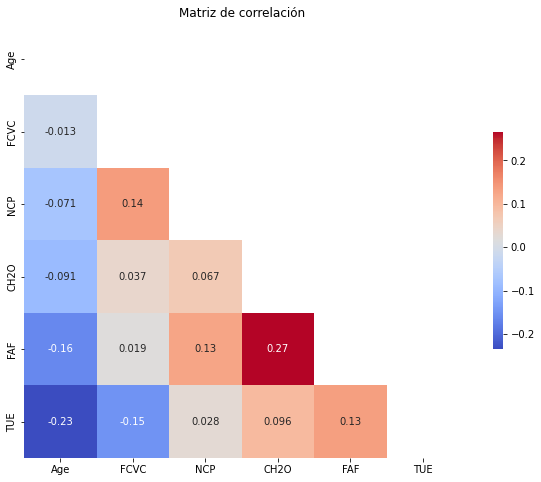

In [25]:
# Crear una copia del dataset
df_copy = df.copy()

# Eliminar las columnas no numéricas
df_numeric = df_copy.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Generar una máscara para la mitad superior de la matriz
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generar el heatmap de la matriz de correlación con la mitad superior
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask, square=True, cbar_kws={"shrink": .5})
plt.title('Matriz de correlación')
plt.savefig("correlacion.png")
plt.show()


Analizando los resultados de la matriz de correlación proporcionados no se observa una fuerte correlación entre variables.Según los resultados de la matriz de correlación, podemos inferir que la edad, la ingesta de agua, la frecuencia de comidas principales y el tiempo de uso de dispositivos electrónicos pueden estar relacionados con los niveles de obesidad en el dataset.

## Extracción manual de características
Acorde con los resultados anteriores, se procederá a unir variables o eliminar variables.

En la sección anterior, se ha decidido eliminar las columnas 'Weight' y 'Height'. Estas variables se utilizaron para calcular el índice de masa corporal (IMC), por lo que su inclusión duplicaría la información y podría generar problemas de multicolinealidad en el análisis posterior. Por lo tanto, para evitar redundancias y simplificar el dataset, se han eliminado dichas columnas.

In [ ]:
df1 = df
print(f'El conjunto de datos consta de {df.shape[0]} filas y {df.shape[1]} columnas')

El conjunto de datos consta de 2110 filas y 15 columnas


A continuación, se presentan las características seleccionadas y modificadas en comparación con los datos iniciales:

1. `Gender`: Género de la persona.
2. `Age`: Edad de la persona.
3. `family_history_with_overweight`: Historial familiar de sobrepeso.
4. `FAVC`: Consumo frecuente de alimentos altos en calorías.
5. `FCVC`: Consumo de vegetales y frutas.
6. `NCP`: Número de comidas principales al día.
7. `CAEC`: Consumo de comida entre comidas.
8. `SMOKE`: Hábito de fumar.
9. `CH2O`: Consumo de agua diario.
10. `SCC`: Consumo de bebidas carbonatadas.
11. `FAF`: Actividad física semanal.
12. `TUE`: Tiempo de uso de dispositivos electrónicos.
13. `CALC`: Consumo de alcohol.
14. `MTRANS`: Medio de transporte utilizado.
15. `NObeyesdad`: Clasificación de la obesidad.

Después de aplicar las transformaciones, filtrar los datos y selección de características, hemos obtenido un conjunto de datos que resume alrededor de 2.110 registros en 15 columnas.

Como resultado de los pasos anteriores, ahora disponemos de un conjunto de datos preprocesado y limpio, sin valores faltantes, que contiene las columnas necesarias para llevar a cabo tareas de ensembles.

### Balanceo de datos

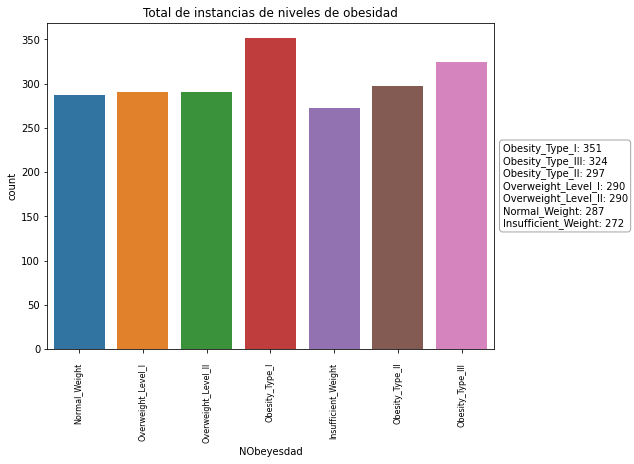

Número de instancias por clase:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [9]:
# Creación de una copia del dataframe balanceado para no afectar a los datos originales y así evitar posibles errores
data = df.copy()

# Gráfico con el total de instancias de cada nivel de obesidad
plt.figure(figsize=(8, 6))  # Tamaño de la figura
ax = sns.countplot(data=df, x='NObeyesdad')
plt.title("Total de instancias de niveles de obesidad")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=8)  # Aumenta el ángulo y el tamaño de la fuente
ax.tick_params(axis='x', pad=10)  # Ajusta el espacio entre las leyendas y el eje x

# Obtener el número de instancias por clase
value_counts = df['NObeyesdad'].value_counts()

# Agregar el cuadro de texto al lado del gráfico
textbox_text = '\n'.join(f"{label}: {count}" for label, count in value_counts.items())
props = dict(boxstyle='round', facecolor='white', edgecolor='gray', alpha=0.7)
plt.text(1.02, 0.5, textbox_text, transform=ax.transAxes, bbox=props, verticalalignment='center')

plt.show()
print('Número de instancias por clase:')
print(df['NObeyesdad'].value_counts())


In [ ]:
data.head(3)

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight


Los datos se encuentran balanceados. Ahora seleccionaremos los datos.

### Selección y preparación de los de datos

Para aplicar esta técnica, seleccionaremos todas las columnas como variables de entrada, y a "NObeyesdad" como variable de salida.

Una vez tenemos el conjunto de datos que vamos a utilizar, realizamos un split, donde utilicemos el 70% de los datos para el train y el 30% de los datos.

In [10]:
# Seleccionamos todas las columnas menos aquella que queremos predecir
x = data.iloc[:, :-1]
y = data['NObeyesdad']

# Iterar sobre las columnas y aplicar la transformación LabelEncoder
for col in x:
    le = LabelEncoder()
    x[col] = le.fit_transform(x[col])

# Convertimos las variables categóricas de 'y' en numéricas
le_descent = LabelEncoder()
y = le_descent.fit_transform(y)

# Convertimos 'y' en un array de numpy
y = np.array(y)

In [27]:
x.head(3)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,7,16,227,1,0,1,2,2,0,1,0,0,1,3,3
1,0,7,6,158,1,0,2,2,2,1,2,1,3,0,2,3
2,1,9,34,356,1,0,1,2,2,0,1,0,2,1,1,3


### Escalamiento de los datos

El escalamiento de los datos es una técnica común de preprocesamiento que se aplica a los datasets antes de aplicar técnicas de aprendizaje automático para garantizar que las variables tengan el mismo peso en los cálculos y para mejorar el rendimiento del modelo.

Para los fines de esta práctica, se utilizarán la clase StandardScaler para aplicar la técnica de ensembles.

In [11]:
# Escalamos los datos de 'X'
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x),columns = x.columns)
x.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,-1.011914,-0.474822,-0.875019,-0.914721,0.472291,-2.759769,-0.355724,0.574095,0.300346,-0.145900,0.480342,-0.218272,-0.882428,1.062270,1.419172,0.503337
1,-1.011914,-0.474822,-1.947207,-1.097178,0.472291,-2.759769,1.313015,0.574095,0.300346,6.853997,2.150858,4.581439,2.720679,-0.654769,-0.521160,0.503337
2,0.988227,-0.153402,1.054919,-0.573605,0.472291,-2.759769,-0.355724,0.574095,0.300346,-0.145900,0.480342,-0.218272,1.519643,1.062270,-2.461491,0.503337
3,0.988227,0.489439,1.054919,0.031942,-2.117337,-2.759769,1.313015,0.574095,0.300346,-0.145900,0.480342,-0.218272,1.519643,-0.654769,-2.461491,1.296280
4,0.988227,-0.314112,0.840481,0.150936,-2.117337,-2.759769,-0.355724,-1.835277,0.300346,-0.145900,0.480342,-0.218272,-0.882428,-0.654769,-0.521160,0.503337
5,0.988227,0.810860,-0.875019,-1.168574,-2.117337,0.362349,-0.355724,0.574095,0.300346,-0.145900,0.480342,-0.218272,-0.882428,-0.654769,-0.521160,-1.875493
6,-1.011914,-0.153402,-2.161644,-1.126265,0.472291,0.362349,1.313015,0.574095,0.300346,-0.145900,0.480342,-0.218272,0.318607,-0.654769,-0.521160,-0.289606
7,0.988227,-0.314112,-0.660581,-1.168574,-2.117337,-2.759769,-0.355724,0.574095,0.300346,-0.145900,0.480342,-0.218272,2.720679,-0.654769,-0.521160,0.503337
8,0.988227,0.007308,0.840481,-0.914721,0.472291,0.362349,1.313015,0.574095,0.300346,-0.145900,0.480342,-0.218272,0.318607,1.062270,-2.461491,0.503337
9,0.988227,-0.314112,0.197169,-0.814237,0.472291,0.362349,-0.355724,0.574095,0.300346,-0.145900,0.480342,-0.218272,0.318607,1.062270,1.419172,0.503337


#### Train y Test

Una vez tenemos el conjunto de datos que vamos a utilizar, realizamos un split, donde utilicemos el 70% de los datos para el train y el 30% de los datos para el test. Para ello utiliza la función train_test_split de Sklearn.(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [12]:
# split into train test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# summarize the shape of the train and test sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1477, 16) (634, 16) (1477,) (634,)


In [13]:
# Hacemos una copia de los datos ya preparados
x_copy_train = x_train.copy()
x_copy_test = x_test.copy()
y_copy_train = y_train.copy()
y_copy_test = y_test.copy()

# Visualizamos la información
x_train.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1432,-1.011914,-0.314112,-1.089457,-0.264220,0.472291,0.362349,-2.024462,-1.835277,0.300346,-0.1459,0.480342,-0.218272,0.318607,1.062270,1.419172,0.503337
644,0.988227,-1.117664,0.733263,-1.107755,0.472291,0.362349,-0.355724,1.778781,0.300346,-0.1459,0.480342,-0.218272,1.519643,1.062270,1.419172,-1.875493
1224,0.988227,-0.314112,0.304388,0.283152,0.472291,0.362349,-0.355724,0.574095,0.300346,-0.1459,0.480342,-0.218272,1.519643,1.062270,1.419172,0.503337
531,0.988227,-0.153402,1.912669,-0.912076,0.472291,0.362349,1.313015,0.574095,0.300346,-0.1459,0.480342,-0.218272,0.318607,-0.654769,-0.521160,-1.875493
955,-1.011914,1.614411,-0.231706,-0.687310,0.472291,0.362349,1.313015,-0.630591,0.300346,-0.1459,-1.190173,-0.218272,-0.882428,-0.654769,-0.521160,-1.875493


### Funciones auxiliares
A continuación, se definen funciones necesarias que permitarán generar la matriz de confusión, curva ROC y cálculo de métricas.


In [14]:
# Función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_test, y_pred, n_classes):
  """
    Evalúa el modelo e imprime por pantalla las estadísitcas
  """
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_test, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_test, y_pred)))

  # Ploteamos la matriz de confusión
  display_labels = sorted(unique_labels(y_test, y_pred), reverse=True)
  cm = confusion_matrix(y_test, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()

  # Ploteamos la curva ROC
  y_test_enc = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred_enc = estimator[1].predict_proba(x_test)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_pred_enc[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  fpr["micro"], tpr["micro"], _ = roc_curve(y_test_enc.ravel(), y_pred_enc.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  colors = cycle(["aqua", "darkorange", "cornflowerblue","olive","orange","purple","fuchsia"])
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Some extension of Receiver operating characteristic to multiclass")
  plt.legend(loc="lower right")
  plt.show()


print('Done!')

Done!


# Técnica de ensembles
En este apartado, analizaremos diferentes técnicas de combinación de ensembles. Los ensembles son una técnica de aprendizaje automático que se basa en combinar múltiples modelos individuales para lograr una predicción más precisa y robusta que la que se puede obtener de un solo modelo. Los modelos individuales en un ensemble pueden ser del mismo tipo o diferentes, y pueden ser entrenados en diferentes subconjuntos de los datos de entrenamiento. ¹

Para ello, emplearemos tres enfoques específicos: bagging, boosting y stacking. A continuación, explicaremos brevemente cada uno de ellos:

Bagging: Entrena varios modelos utilizando subconjuntos aleatorios del conjunto de datos de entrenamiento. Posteriormente, se combinan las predicciones de estos modelos mediante votación o promedio, lo que permite obtener un resultado final más preciso.¹

Boosting: Los modelos se entrenan secuencialmente, dándole mayor peso a los errores de las predicciones anteriores. De esta manera, el modelo se ajusta gradualmente para mejorar su rendimiento y capacidad de predicción.¹

Stacking: Se combina la salida de varios modelos en un conjunto de datos auxiliar. Luego, se entrena otro modelo utilizando estas predicciones como características para predecir la variable objetivo. La finalidad es aprovechar las fortalezas individuales de cada modelo y mejorar la precisión global de las predicciones.¹

En el conjunto de datos de obesidad, nos enfocaremos en la clasificación de la columna "NObeyesdad", que representa los niveles de obesidad. Los posibles valores para esta columna son Peso Insuficiente, Peso Normal, Sobrepeso Nivel I Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III.


Referencia:
(1) 1.11. Ensemble methods — scikit-learn 1.3.0 documentation. https://scikit-learn.org/stable/modules/ensemble.html.


Por lo anterior, procederemos a crear un modelo con cada uno de los técnicas de ensembles mencionados anteriormente y evaluaremos su rendimiento. Igual,definimos cuales modelos utilizaremos para evaluar el conjunto de datos de obesidad y consideraremos Bagging, Random Forest, AdaBoost, GradientBoost y Stacking como los modelos principales.

Finalmente, utilizaremos la técnica de GridSearchCV de scikit-learn que nos permite seleccionar los parámetros óptimos de cada modelo. Utilizando validación cruzada y una métrica específica, GridSearchCV determinará los mejores valores para cada parámetro.


In [15]:
estim = [('knn', KNeighborsClassifier(n_neighbors=3)),
         ('cart', DecisionTreeClassifier(random_state=0)),
         ('svm', SVC(random_state=0)),
         ('lr', LogisticRegression(random_state=0))]

# Lista con los ensembles a evaluar.
ensembles = [
    BaggingClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0),
    StackingClassifier(estimators=estim)
]

 Definimos los parámetros a utilizar para cada uno de los modelos e incluimos en una lista consolidada. Para ello, especificamos los diferentes conjuntos de parámetros para cada algoritmo, como Bagging, Random Forest, AdaBoost, GradientBoost y Stacking. En el conjunto de parámetros definimos una lista de valores posibles para diferentes hiperparámetros, como el número de estimadores, la profundidad máxima del árbol, la tasa de aprendizaje, entre otros.

 Agrupamos estos conjuntos de parámetros en una lista llamada 'parameters', que nos permitirá realizar la búsqueda de los mejores hiperparámetros para cada algoritmo mediante técnicas como GridSearchCV.

In [16]:
bagging_parameters = {
    'estimator': [DecisionTreeClassifier(random_state=0), SVC(random_state=0), KNeighborsClassifier(n_neighbors=1),
                  SGDClassifier(max_iter=10000, tol=1e-3, random_state=0)],
    'n_estimators'  : [1, 5, 10, 20,50,100,200,300],
    'max_samples'   : [0.25, 0.5,0.6, 0.75, 1],
    'max_features'  : [0.25, 0.5, 0.75,0.8, 1]
}

randomforest_parameters = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth'   : [None, 1, 2, 5,7,15],
    'max_features':  ['auto', 'log2'],
    'max_samples' : [None, 0.25, 0.5, 0.75, 1 ]
}

adaboost_parameters = {
    'estimator'      : [DecisionTreeClassifier(random_state=0), SVC(random_state=0), KNeighborsClassifier(n_neighbors=1), SGDClassifier(max_iter=10000, tol=1e-3, random_state=0)],
    'n_estimators' : [1, 5, 10, 20,50, 100, 200,300],
    'learning_rate'  : [0.25, 0.1, 0.5, 1, 5]
}

gradientboost_parameters = {
    'learning_rate'  : [0.25, 0.5, 1, 5],
    'n_estimators' : [1, 5, 10, 20,50,100,200,300],
    'max_depth'      : [None, 1, 2, 5,7,10,15],
}

stacking_parameters = {
    'final_estimator' : [LogisticRegression(random_state=0), GradientBoostingClassifier(random_state=0)]
}

parameters = [
    bagging_parameters,
    randomforest_parameters,
    adaboost_parameters,
    gradientboost_parameters,
    stacking_parameters
]

A continuación, buscamos optimizar el desempeño de cada modelo y obtener la configuración óptima para cada algoritmo. En las listas 'estimators', 'accuracies' y 'times' l se almacenaa información de los modelos ajustados que nos permitirá analizar la precisión de cada uno y comparar los tiempos de ejecución.

Para ello, definimos una lista vacía llamada 'estimators' para almacenar los modelos ajustados, otra lista llamada 'accuracies' para almacenar las precisiones obtenidas por cada modelo y una tercera lista llamada 'times' para almacenar los tiempos de ejecución.

Iteramos sobre cada modelo para realizar una búsqueda exhaustiva de los mejores parámetros utilizando GridSearchCV. Utilizamos la métrica de precisión ('accuracy') como medida de evaluación y realizamos una validación cruzada con 10 folds.

Luego, se imprimen los mejores parámetros encontrados, la precisión obtenida en los datos de prueba y el tiempo de ajuste y entrenamiento. Se almacenan la precisión y el tiempo en las listas correspondientes. Se agrega una tupla que contiene el nombre del modelo de ensamble y el objeto clf (modelo ajustado) a la lista 'estimators', lo que permite acceder a los modelos ajustados posteriormente.



In [ ]:
#warnings.filterwarnings("ignore")

In [17]:
estimators = [] # Para almacenar los modelos
accuracies = [] # Para almacenar su precisión
times = [] # Para almacenar el tiempo

# Iteramos para cada uno de los modelos de ensembles
for i, ensemble in enumerate(ensembles):
    start_time = time.time()

    clf = GridSearchCV(ensemble,          # Modelo
              param_grid = parameters[i], # Parámetro
              scoring='accuracy',         # Métrica de evaluación
              cv=10)                      # Número de folds para el CV
    print('************', ensemble.__class__.__name__, '************')
    clf.fit(x_train, y_train)
    print("Parámetros :", clf.best_params_)
    acc = (clf.predict(x_test) == y_test).mean()*100
    print("Accuracy :", (acc))
    sec = (time.time() - start_time)
    print("Time of tunning and training :", (sec))
    accuracies.append((ensemble.__class__.__name__, acc))
    times.append((ensemble.__class__.__name__, sec))
    estimators.append((ensemble.__class__.__name__, clf))

************ BaggingClassifier ************


/home/alfredo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


400 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "/home/alfredo/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/alfredo/.local/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 339, in fit
    return self._fit(X, y, self.max_samples, sample_weight=sample_weight)
  File "/home/alfredo/.local/lib/python3.8/site-packages/sklearn/ensemble/_bagging.py", line 474, in _fit
    all_

Parámetros : {'estimator': DecisionTreeClassifier(random_state=0), 'max_features': 0.75, 'max_samples': 0.75, 'n_estimators': 200}
Accuracy : 96.52996845425868
Time of tunning and training : 5875.281061887741
************ RandomForestClassifier ************


/home/alfredo/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/home/alfredo/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.

/home/alfredo/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default val

KeyboardInterrupt: 

Procedemos a visualizar los datos con un gráfico de barras donde comparamos la precisión y en otro el tiempo de ejecución de cada modelo, utilizando la función make_subplots de Plotly.

In [ ]:
from plotly.subplots import make_subplots
df = pd.DataFrame(accuracies, columns=['Model', 'Accuracy (%)'])
df2 = pd.DataFrame(times, columns=['Model', 'Time (secs)'])

fig = make_subplots(rows=1, cols=2)

fig.append_trace(go.Bar(x=df['Model'], y=df['Accuracy (%)'], name="Accuracy (%)",
                        textposition="none"), row=1, col=1)

fig.append_trace(go.Bar(x=df2['Model'], y=df2['Time (secs)'], name="Time (secs)",
                        textposition="none"), row=1, col=2)

fig.update_layout(height=400, width=1200,
                  title={'x': 0.5, 'y': 0.9, 'font': {'size': 16},
                         'text': 'Precisión y tiempo de ejecución por modelo',
                         'xanchor': 'center', 'yanchor': 'top'}
                 )
fig.show()

La precisión de todos los modelos en el conjunto de validación supera el 76%. Estos resultados muestran que todos los modelos tienen un desempeño moderadamente satisfactorio como clasificadores en este conjunto de datos. Sin embargo, si tuviéramos que elegir uno dado el tiempo que lleva configurarlo y entrenarlo, el modelo Stacking Classifier se destaca por ofrecer excelentes resultados con menos tiempo de entrenamiento.

Además, evaluaremos cada modelo con otras métricas adicionales, donde se definen las funciones necesarias que permitirán generar la matriz de confusión, la curva ROC y calcular métricas como precisión, recuperación y F1 score para cada clase, así como la precisión global del modelo.

Se construye una curva ROC que muestra la relación entre las tasas de verdaderos positivos y falsos positivos para cada clase. El área bajo la curva (AUC) se calcula para evaluar el rendimiento del modelo. Se incluyen curvas para cada clase, así como curvas medias (micro y macro) que resumen el desempeño global del modelo.

In [ ]:
# Función auxiliar que evalúa los resultados de una clasificación
def evaluate_model(y_test, y_pred, n_classes):
  """
    Evalúa el modelo e imprime por pantalla las estadísitcas
  """
  print('==== Sumario de la clasificación ==== ')
  print(classification_report(y_test, y_pred))

  print('Accuracy -> {:.2%}\n'.format(accuracy_score(y_test, y_pred)))

  # Ploteamos la matriz de confusión
  display_labels = sorted(unique_labels(y_test, y_pred), reverse=True)
  cm = confusion_matrix(y_test, y_pred, labels=display_labels)

  z = cm[::-1]
  x = display_labels
  y =  x[::-1].copy()
  z_text = [[str(y) for y in x] for x in z]

  fig_cm = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

  fig_cm.update_layout(
      height=400, width=400,
      showlegend=True,
      margin={'t':150, 'l':0},
      title={'text' : 'Matriz de Confusión', 'x':0.5, 'xanchor': 'center'},
      xaxis = {'title_text':'Valor Real', 'tickangle':45, 'side':'top'},
      yaxis = {'title_text':'Valor Predicho', 'tickmode':'linear'},
  )
  fig_cm.show()

  # Ploteamos la curva ROC
  y_test_enc = label_binarize(y_test, classes=np.arange(n_classes))
  y_pred_enc = estimator[1].predict_proba(x_test)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_enc[:, i], y_pred_enc[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  fpr["micro"], tpr["micro"], _ = roc_curve(y_test_enc.ravel(), y_pred_enc.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )

  plt.plot(
      fpr["macro"],
      tpr["macro"],
      label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
      color="navy",
      linestyle=":",
      linewidth=4,
  )

  colors = cycle(["aqua", "darkorange", "cornflowerblue","olive","orange","purple","fuchsia"])
  for i, color in zip(range(n_classes), colors):
      plt.plot(
          fpr[i],
          tpr[i],
          color=color,
          lw=lw,
          label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
      )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("Some extension of Receiver operating characteristic to multiclass")
  plt.legend(loc="lower right")
  plt.show()


print('Done!')

Done!


Ejecutamos la evaluación de cada modelo y mostramos los resultados obtenidos mediante la generación de un informe, la visualización de la matriz de confusión y la plotización de la curva ROC.

****************************************************************
Evaluación del modelo  BaggingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        93
           1       0.58      0.62      0.60        78
           2       0.79      0.75      0.77       104
           3       0.86      0.95      0.90        99
           4       0.97      1.00      0.98        90
           5       0.75      0.76      0.75        86
           6       0.76      0.66      0.71        83

    accuracy                           0.80       633
   macro avg       0.79      0.79      0.79       633
weighted avg       0.80      0.80      0.80       633

Accuracy -> 80.09%



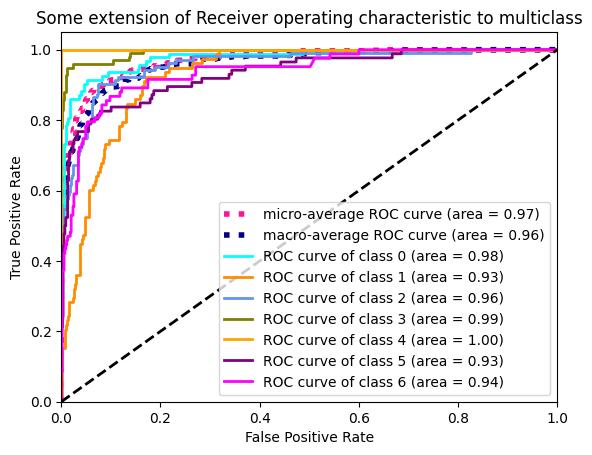

****************************************************************
Evaluación del modelo  RandomForestClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        93
           1       0.55      0.65      0.60        78
           2       0.82      0.77      0.79       104
           3       0.88      0.94      0.91        99
           4       0.99      1.00      0.99        90
           5       0.75      0.76      0.75        86
           6       0.77      0.69      0.73        83

    accuracy                           0.80       633
   macro avg       0.80      0.80      0.80       633
weighted avg       0.81      0.80      0.81       633

Accuracy -> 80.41%



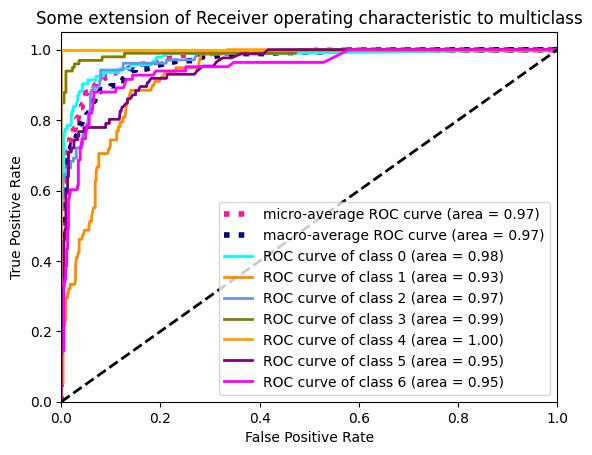

****************************************************************
Evaluación del modelo  AdaBoostClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        93
           1       0.52      0.55      0.54        78
           2       0.70      0.74      0.72       104
           3       0.89      0.89      0.89        99
           4       0.99      1.00      0.99        90
           5       0.77      0.70      0.73        86
           6       0.60      0.60      0.60        83

    accuracy                           0.76       633
   macro avg       0.76      0.76      0.76       633
weighted avg       0.77      0.76      0.77       633

Accuracy -> 76.46%



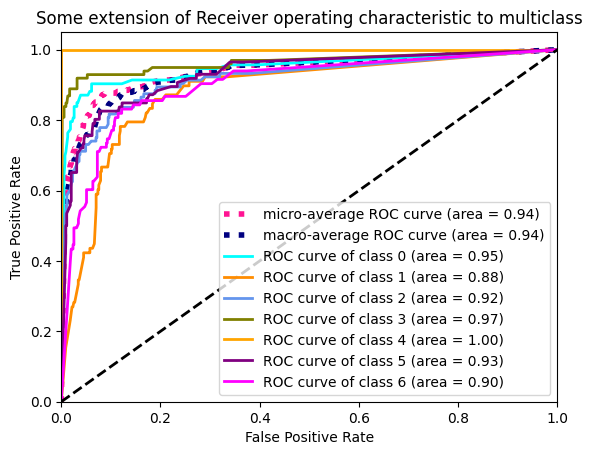

****************************************************************
Evaluación del modelo  GradientBoostingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        93
           1       0.57      0.63      0.60        78
           2       0.80      0.78      0.79       104
           3       0.88      0.91      0.90        99
           4       0.96      1.00      0.98        90
           5       0.78      0.69      0.73        86
           6       0.69      0.71      0.70        83

    accuracy                           0.79       633
   macro avg       0.79      0.79      0.79       633
weighted avg       0.80      0.79      0.79       633

Accuracy -> 79.46%



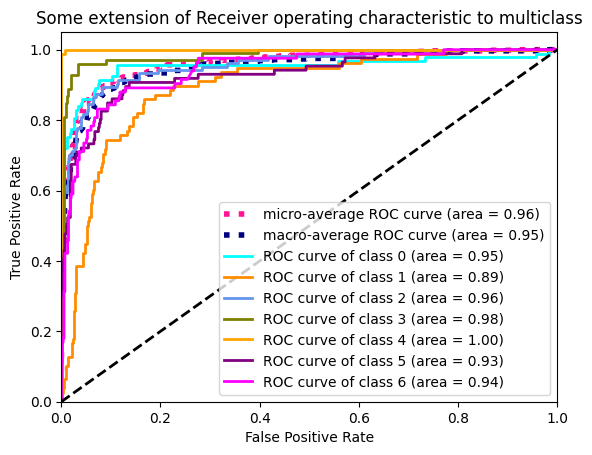

****************************************************************
Evaluación del modelo  StackingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        93
           1       0.54      0.58      0.56        78
           2       0.78      0.71      0.74       104
           3       0.90      0.88      0.89        99
           4       1.00      0.99      0.99        90
           5       0.69      0.77      0.73        86
           6       0.67      0.71      0.69        83

    accuracy                           0.78       633
   macro avg       0.78      0.77      0.77       633
weighted avg       0.79      0.78      0.78       633

Accuracy -> 77.88%



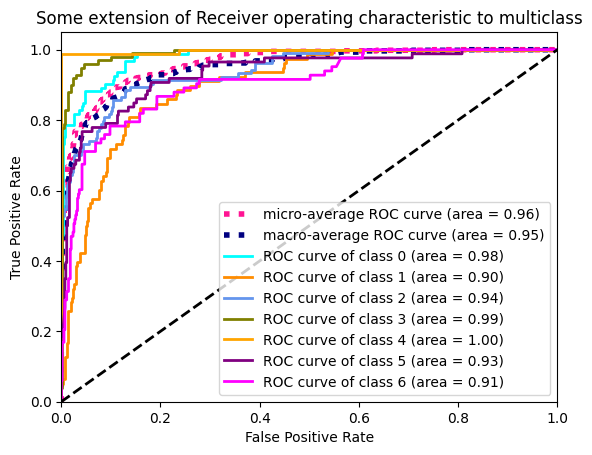

In [ ]:
lw = 2
n_classes = len(np.unique(y_test))

for estimator in estimators:
    print('****************************************************************')
    print('Evaluación del modelo ', estimator[0])
    print('****************************************************************')
    y_pred = estimator[1].predict(x_test)

    evaluate_model(y_test, y_pred, n_classes)



Basándonos en la evaluación del modelo RandomForestClassifier, se observa un alto rendimiento en la clasificación de las diferentes clases. La precisión varía para cada clase, con valores que oscilan entre el 55% y el 99%. Esto indica que el modelo es capaz de clasificar correctamente una variedad de instancias en diferentes clases.

En cuanto a la métrica de recall, se aprecia que el modelo tiene una tasa de recuperación (recall) alta para la mayoría de las clases, con valores que oscilan entre el 65% y el 100%. Esto significa que el modelo es capaz de identificar correctamente la mayoría de las instancias positivas para cada clase.

La métrica f1-score también muestra un desempeño sólido, con valores que oscilan entre el 60% y el 99% para cada clase. Esto indica un equilibrio entre la precisión y el recall, lo que sugiere que el modelo puede clasificar correctamente las instancias positivas sin comprometer la precisión general.

En general, el modelo RandomForestClassifier muestra un rendimiento sólido con una precisión general del 80.41%. Aunque la precisión puede variar según la clase, el modelo sigue siendo confiable para clasificar instancias en este conjunto de datos.

Se procede a evaluar los modelos con los mejores hiperpárametros encontrados.

****************************************************************
Evaluación del modelo BaggingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84        93
           1       0.58      0.62      0.60        78
           2       0.79      0.75      0.77       104
           3       0.86      0.95      0.90        99
           4       0.97      1.00      0.98        90
           5       0.75      0.76      0.75        86
           6       0.76      0.66      0.71        83

    accuracy                           0.80       633
   macro avg       0.79      0.79      0.79       633
weighted avg       0.80      0.80      0.80       633

Accuracy -> 80.09%



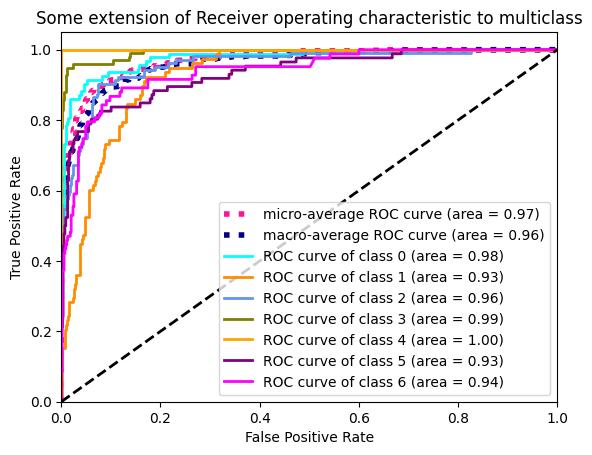

****************************************************************
Evaluación del modelo RandomForestClassifier
****************************************************************


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:425: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        93
           1       0.55      0.65      0.60        78
           2       0.82      0.77      0.79       104
           3       0.88      0.94      0.91        99
           4       0.99      1.00      0.99        90
           5       0.75      0.76      0.75        86
           6       0.77      0.69      0.73        83

    accuracy                           0.80       633
   macro avg       0.80      0.80      0.80       633
weighted avg       0.81      0.80      0.81       633

Accuracy -> 80.41%



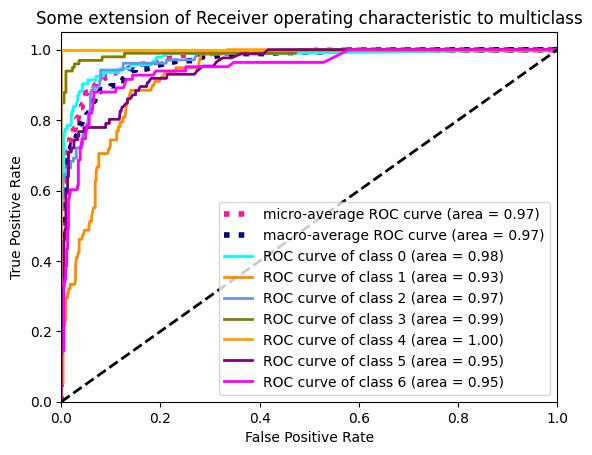

****************************************************************
Evaluación del modelo AdaBoostClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        93
           1       0.52      0.55      0.54        78
           2       0.70      0.74      0.72       104
           3       0.89      0.89      0.89        99
           4       0.99      1.00      0.99        90
           5       0.77      0.70      0.73        86
           6       0.60      0.60      0.60        83

    accuracy                           0.76       633
   macro avg       0.76      0.76      0.76       633
weighted avg       0.77      0.76      0.77       633

Accuracy -> 76.46%



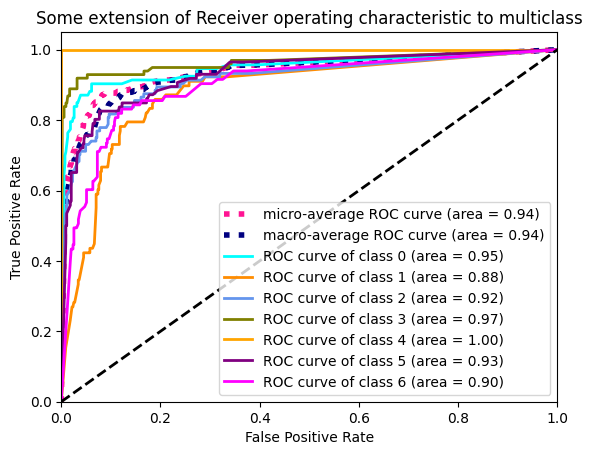

****************************************************************
Evaluación del modelo GradientBoostingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        93
           1       0.57      0.63      0.60        78
           2       0.80      0.78      0.79       104
           3       0.88      0.91      0.90        99
           4       0.96      1.00      0.98        90
           5       0.78      0.69      0.73        86
           6       0.69      0.71      0.70        83

    accuracy                           0.79       633
   macro avg       0.79      0.79      0.79       633
weighted avg       0.80      0.79      0.79       633

Accuracy -> 79.46%



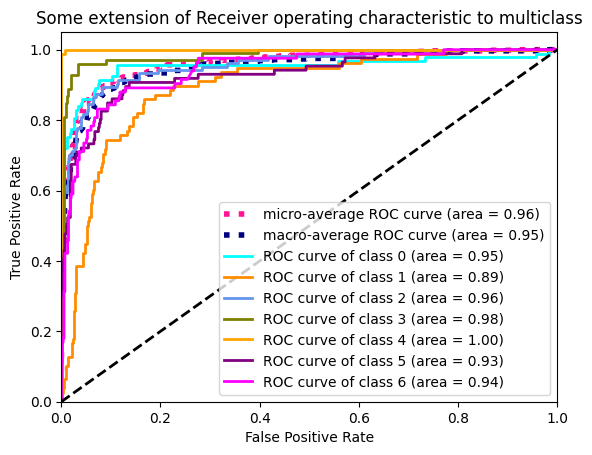

****************************************************************
Evaluación del modelo StackingClassifier
****************************************************************
==== Sumario de la clasificación ==== 
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        93
           1       0.54      0.58      0.56        78
           2       0.78      0.71      0.74       104
           3       0.90      0.88      0.89        99
           4       1.00      0.99      0.99        90
           5       0.69      0.77      0.73        86
           6       0.67      0.71      0.69        83

    accuracy                           0.78       633
   macro avg       0.78      0.77      0.77       633
weighted avg       0.79      0.78      0.78       633

Accuracy -> 77.88%



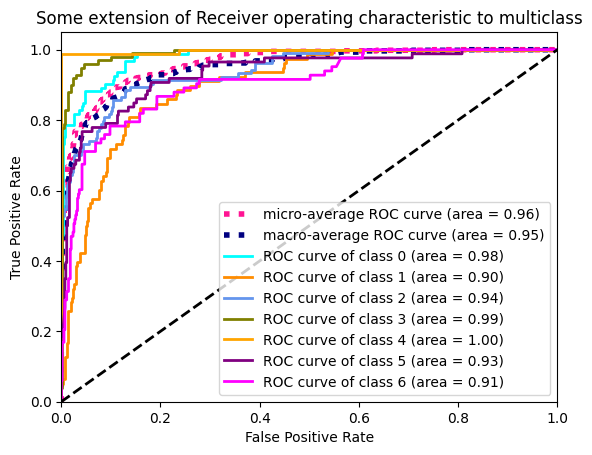

In [ ]:
lw = 2
n_classes = len(np.unique(y_test))

for estimator in estimators:
    print('****************************************************************')
    print('Evaluación del modelo', estimator[0])
    print('****************************************************************')

    best_params = estimator[1].best_params_  # Obtener los mejores hiperparámetros

    # Crear un nuevo estimador con los mejores hiperparámetros
    best_estimator = estimator[1].best_estimator_

    # Ajustar el modelo con los mejores hiperparámetros al conjunto de entrenamiento
    best_estimator.fit(x_train, y_train)

    # Predecir las etiquetas del conjunto de prueba
    y_pred = best_estimator.predict(x_test)

    # Evaluar el modelo utilizando la función evaluate_model
    evaluate_model(y_test, y_pred, n_classes)
